# Analyse der Zensusdaten bzw. des Stimmanteils der Grünen bei der BTW 2025 in Rheinland-Pfalz

In [3]:
# Pakete laden:
import pandas as pd
import geopandas as gpd
from tobler.model import glm
from tobler.area_weighted import area_interpolate
from tobler.pycno import pycno_interpolate
import matplotlib.pyplot as plt

In [18]:
# Laden der Daten, die wir in data_editing_absolut.py 
# bzw. _anteile.py zusammengestellt haben

# Landkreis-Struktur
zensus_landkreise_geo = gpd.read_file("editing_ergebnis/zensus_landkreise_absolut.gpkg")
# 1-qkm-Grid
zensus_1km_rlp = gpd.read_file("editing_ergebnis/zensus_1km_rlp_absolut.gpkg")

Wie sah das Wahlergebnis der Grünen (Zweitstimme) denn auf Ebene der Landkreise aus?

<Axes: >

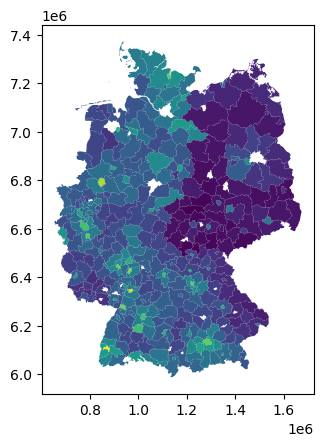

In [19]:
zensus_landkreise_geo.plot(column="GRUENE_Anteil")

Und in Rheinland-Pfalz:

<Axes: >

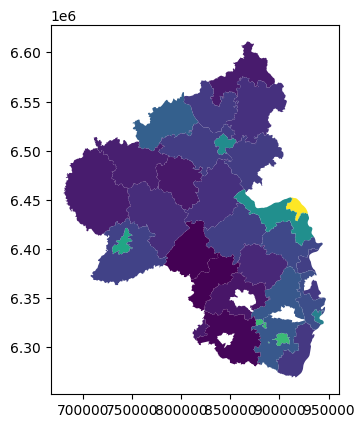

In [20]:
zensus_landkreise_geo[zensus_landkreise_geo.schluessel.apply(lambda x: x[0:2]) == '07'].plot(column="GRUENE_Anteil")

In [ ]:
# Weg wegen Multikollinearitaet:
colinear = ['Personen unter 18 Jahren', 'keine Heizung', 'keine Energieträger', 'Gebäude vor 1919']

cols_regression = {x for x in zensus_1km_df.columns.to_list()}
cols_regression = cols_regression & {x for x in zensus_landkreise.columns.to_list()}
cols_regression = cols_regression.difference(colinear)
cols_regression = list(cols_regression)

final_landkreise = zensus_landkreise.merge(btw25_ergebnis_kreis[["Statistische Kennziffer", "GRÜNE - Zweitstimmen", "GRÜNE - Zweitstimmen_Anteil"]],
                        left_on= ars, right_on="Statistische Kennziffer")

